In [1]:
# Cell 1 - imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image, ImageOps
from sklearn.metrics import classification_report, confusion_matrix


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step
Shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


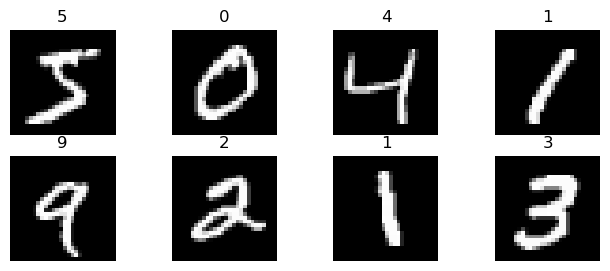

In [2]:
# Cell 2 - load & normalize
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# show a few examples
plt.figure(figsize=(8,3))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


In [3]:
# Cell 3 - model definition (dense)
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Cell 4 - training
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
mc = ModelCheckpoint('mnist_dense_best.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.10,
                    callbacks=[es, mc])


Epoch 1/20
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7930 - loss: 0.7060 

422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8829 - loss: 0.4019 - val_accuracy: 0.9597 - val_loss: 0.1453
Epoch 2/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9434 - loss: 0.1899

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9475 - loss: 0.1762 - val_accuracy: 0.9727 - val_loss: 0.1057
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9599 - loss: 0.1332

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9601 - loss: 0.1327 - val_accuracy: 0.9753 - val_loss: 0.0867
Epoch 4/20
414/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 0.1005

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9682 - loss: 0.1045 - val_accuracy: 0.9758 - val_loss: 0.0816
Epoch 5/20
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9719 - loss: 0.0903

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9716 - loss: 0.0917 - val_accuracy: 0.9778 - val_loss: 0.0767
Epoch 6/20
415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9756 - loss: 0.0801

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9759 - loss: 0.0787 - val_accuracy: 0.9787 - val_loss: 0.0695
Epoch 7/20
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9764 - loss: 0.0728

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9775 - loss: 0.0713 - val_accuracy: 0.9808 - val_loss: 0.0693
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9802 - loss: 0.0609 - val_accuracy: 0.9790 - val_loss: 0.0718
Epoch 9/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9823 - loss: 0.0556 - val_accuracy: 0.9790 - val_loss: 0.0742
Epoch 10/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9839 - loss: 0.0493

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9831 - loss: 0.0523 - val_accuracy: 0.9818 - val_loss: 0.0684
Epoch 11/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9844 - loss: 0.0476 - val_accuracy: 0.9817 - val_loss: 0.0673
Epoch 12/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9860 - loss: 0.0434 - val_accuracy: 0.9817 - val_loss: 0.0727
Epoch 13/20
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9870 - loss: 0.0386

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9865 - loss: 0.0407 - val_accuracy: 0.9823 - val_loss: 0.0673
Epoch 14/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9869 - loss: 0.0377 - val_accuracy: 0.9813 - val_loss: 0.0699
Epoch 15/20
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9879 - loss: 0.0345

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9874 - loss: 0.0367 - val_accuracy: 0.9825 - val_loss: 0.0658
Epoch 16/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9884 - loss: 0.0332 - val_accuracy: 0.9820 - val_loss: 0.0701
Epoch 17/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9888 - loss: 0.0327 - val_accuracy: 0.9807 - val_loss: 0.0766
Epoch 18/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9896 - loss: 0.0308 - val_accuracy: 0.9825 - val_loss: 0.0712


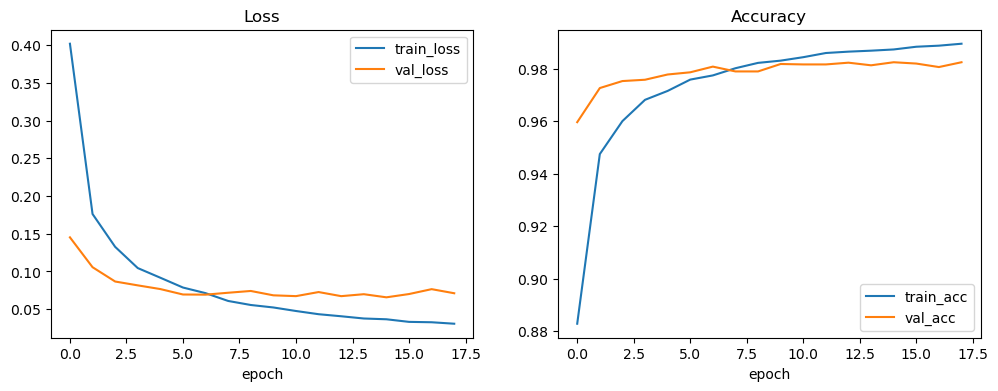

In [5]:
# Cell 5 - plot curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.legend()

plt.show()


Test loss: 0.0712   Test accuracy: 0.9780
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


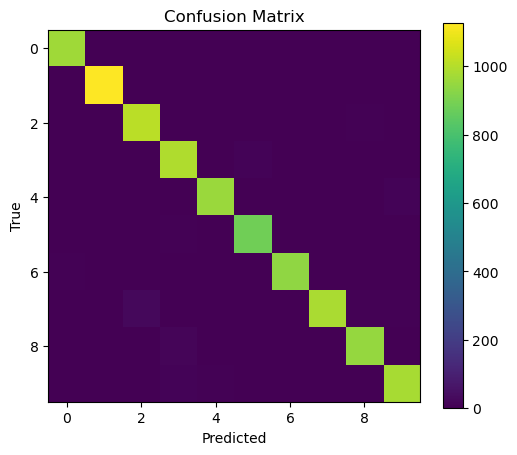

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [6]:
# Cell 6 - evaluate + metrics
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}   Test accuracy: {acc:.4f}")

# predictions
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))


In [7]:
# Cell 7 - save model
model.save('mnist_dense_model.h5')
print("Saved mnist_dense_model.h5")


Saved mnist_dense_model.h5


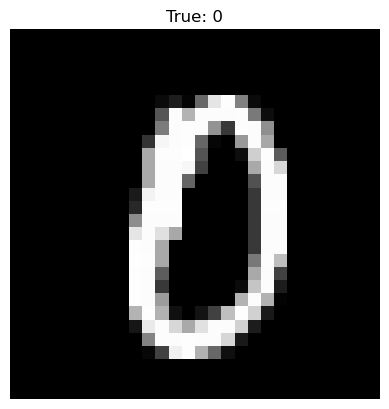

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted: 0


In [8]:
# Cell 8 - load and predict example
m = load_model('mnist_dense_best.h5')  # best model saved by checkpoint
idx = 55
plt.imshow(x_test[idx], cmap='gray')
plt.title(f"True: {y_test[idx]}")
plt.axis('off')
plt.show()

pred = m.predict(x_test[idx:idx+1]).argmax()
print("Predicted:", pred)


In [11]:
import os


Selected file: C:/Users/yamun/OneDrive/Pictures/digit1.png.png


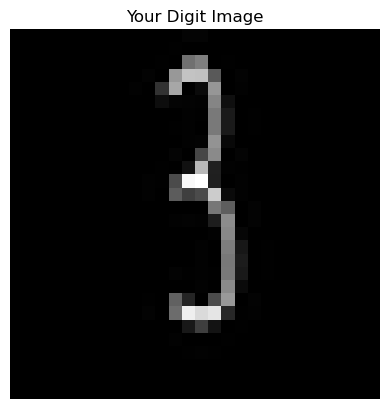

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Digit: 1


In [17]:
from tkinter import Tk, filedialog
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(path):
    img = Image.open(path).convert('L')
    img = img.resize((28,28), Image.LANCZOS)  # updated
    arr = np.array(img).astype('float32') / 255.0
    if arr.mean() > 0.5:
        arr = 1.0 - arr
    return arr

Tk().withdraw()  # hide small root window
img_path = filedialog.askopenfilename(title="Select a digit image",
                                      filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])

print("Selected file:", img_path)

img_arr = preprocess_image(img_path)

plt.imshow(img_arr, cmap='gray')
plt.title("Your Digit Image")
plt.axis('off')
plt.show()

pred = model.predict(img_arr.reshape(1,28,28)).argmax()
print("Predicted Digit:", pred)
